In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns
import pandas as pd
import math
import scipy

In [2]:
loans_income = pd.read_csv('data/loans_income.csv')
loans_income.head()

,x
0,67000
1,52000
2,100000
3,78762
4,37041


In [3]:
sample = pd.DataFrame({'samp_data': loans_income.sample(n=1000).x.values,
                       'mean_of_5': [loans_income.sample(n=5).x.mean() for _ in range(1000)],
                       'mean_of_20': [loans_income.sample(n=20).x.mean() for _ in range(1000)]})

Text(0, 0.5, 'counts')

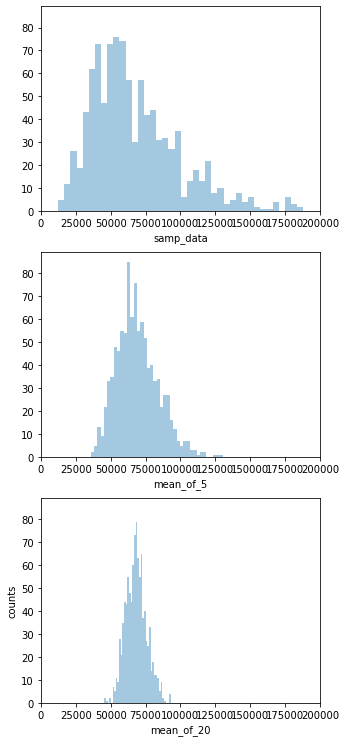

In [4]:
fig, ax = plt.subplots(nrows=3,ncols=1, sharey=True, figsize=(5,9))
for i, col in enumerate(sample.columns):
    sns.distplot(sample[col], bins=40, kde = False, ax = ax[i])
    ax[i].set_xlim(0,200000)

plt.subplots_adjust(top=1.2)
plt.ylabel('counts')

In [5]:
n = 20
R = 1000
boot_sample = pd.DataFrame({'samp': [loans_income.sample(n, replace=True).x.mean() for _ in range(R)]})

In [6]:
print("Meadian: {}".format(boot_sample.median().values[0]))
print("Standard Error: {:.2f}".format(boot_sample.std().values[0]))

Meadian: 68612.725
Standard Error: 7467.99


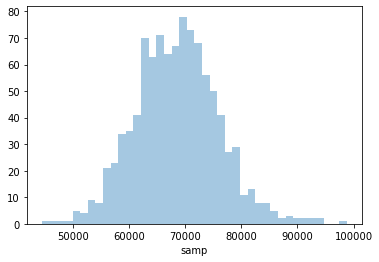

In [7]:
sns.distplot(boot_sample['samp'], bins=40, kde=False)

### Standard Error = $\frac{s}{\sqrt{n}}$

In [8]:
standard_error = loans_income.x.std()/math.sqrt(n)
print("Standard Error: {:.2f}".format(standard_error))

Standard Error: 7350.41


In [9]:
def get_sample_z(sample):
    z = (sample - np.mean(sample))/np.std(sample)
    df = pd.DataFrame({"x": sample, "y": z})
    return df

def newline(p1, p2, ax=None):
    if not ax:
        ax = plt.gca()
    xmin, xmax = ax.get_xbound()

    if(p2[0] == p1[0]):
        xmin = xmax = p1[0]
        ymin, ymax = ax.get_ybound()
    else:
        ymax = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmax-p1[0])
        ymin = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmin-p1[0])

    l = mlines.Line2D([xmin,xmax], [ymin,ymax], color='#32696969')
    ax.add_line(l)
    return l

In [10]:
norm_samp = np.random.normal(size=(100))

In [11]:
normal_df = get_sample_z(norm_samp)

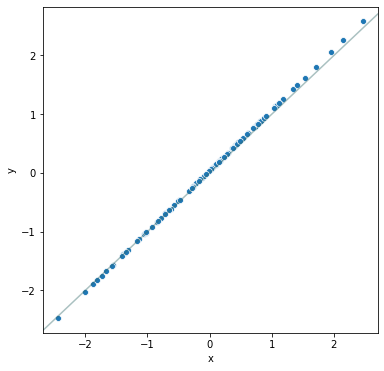

In [12]:
fig = plt.figure(figsize=(6,6))
sns.scatterplot(x='x', y='y', data=normal_df)
newline([0,0],[1,1])

In [13]:
sp500_px = pd.read_csv('data/sp500_data.csv')
nflx = sp500_px['NFLX']

In [14]:
nflx = nflx[nflx>0].apply(np.log).diff().dropna()

In [15]:
nflx_df = get_sample_z(nflx.values)

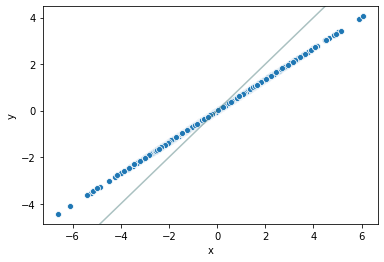

In [16]:
sns.scatterplot(x='x',y='y', data=nflx_df)
newline([0,0],[1,1])

# Binomial Distribution

$f(n,k,p) = {n \choose k}p^k(1-p)^{n-k}$

In [17]:
scipy.stats.binom.pmf(k=2, n=5, p=0.1)

0.0729

In [18]:
scipy.stats.binom.cdf(k=2, n=5, p=0.1)

0.99144

# Poisson Distribution

In [19]:
p = scipy.stats.poisson.rvs(mu=2, size=100)
p

array([6, 2, 3, 1, 3, 3, 1, 1, 1, 1, 3, 2, 3, 1, 0, 3, 5, 0, 3, 1, 4, 2,
       1, 2, 3, 1, 2, 2, 2, 1, 2, 3, 0, 1, 2, 0, 0, 1, 2, 5, 3, 2, 3, 3,
       2, 0, 1, 6, 2, 1, 0, 0, 2, 2, 0, 0, 3, 1, 2, 5, 4, 4, 5, 1, 4, 4,
       4, 1, 3, 0, 4, 3, 2, 5, 2, 1, 0, 0, 2, 3, 4, 6, 2, 2, 1, 0, 0, 2,
       3, 3, 5, 2, 1, 2, 3, 1, 2, 1, 0, 1])

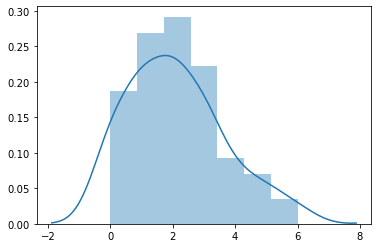

In [20]:
sns.distplot(p)

# Exponential Distribution
**scipy**: $f(x) = e^{-\frac{x}{scale}}$

**rexp**: $f(x) = \lambda e^{-\lambda x}$

Hence $scale = \frac{1}{\lambda}$ and we divide scipy result by $scale$

In [21]:
sc = 1/0.2
e = scipy.stats.expon.rvs(size=100, scale=sc)/sc
e

array([1.31369767, 2.58084959, 0.68847434, 3.7506923 , 2.77925389,
       0.18431454, 1.36527942, 0.19992532, 1.84985956, 1.07275495,
       1.08388997, 0.38016984, 1.22492761, 0.67369204, 0.28373024,
       0.07275234, 0.7015021 , 2.69347532, 0.27815546, 0.75165696,
       0.47328535, 0.60370433, 1.2233298 , 0.27535645, 0.31101529,
       0.27210844, 0.10521468, 0.087119  , 1.51793577, 0.85781687,
       0.4545887 , 1.32363855, 0.04344649, 2.0764388 , 0.1306994 ,
       0.2926386 , 0.34525529, 2.32783193, 0.06243922, 0.3533696 ,
       1.35005342, 0.43625653, 0.04926499, 0.24157675, 3.13240252,
       0.00788493, 1.47806405, 0.56753788, 0.39834014, 2.12451742,
       0.15071791, 0.20075552, 2.29621196, 0.6583605 , 1.95584231,
       3.47722766, 0.61287082, 0.5123028 , 0.72788751, 0.46243844,
       1.21389222, 0.39017736, 0.21285942, 2.02381648, 0.55528794,
       1.58320517, 0.45190374, 0.70919675, 0.29774062, 1.38583629,
       0.32720083, 0.08163084, 0.26231761, 0.14199828, 0.42536

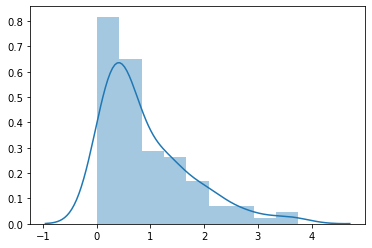

In [22]:
sns.distplot(e)

# Weibull Distribution
$f(x,c,\lambda) = \frac{c}{\lambda}(\frac{x}{\lambda})^{c-1}e^{\frac{x}{\lambda}^c}$

$\lambda = scale$

In [23]:
w = scipy.stats.weibull_min.rvs(size=100,c=1.5, scale=5000)
w

array([ 6480.66458098,  4803.45863713,  3043.0773361 ,  6327.12972677,
        1136.30476012,  4397.40213191,  1646.83826878,  8015.25929323,
        3124.01409613,   910.96907008,  6550.07867758,  2609.81739047,
        7077.58595581,  2005.30948958,  1702.14229261,  9575.83828989,
        3397.27267079,  1455.82964761,  1084.50310214,   606.90943746,
        4885.18967796,  1855.85613507,  6137.08819611,   773.54895008,
         667.686785  ,  3663.2363557 ,  8319.40068268,  7122.00580181,
        2215.29313203,  9795.94525483,  4653.87125165, 10081.87651978,
        6051.91673178, 12492.26520462,  7699.548797  , 12542.0264523 ,
        3499.64327818,  7571.57968239,  5031.5147974 ,   997.94270587,
        4041.46903357,  3104.70787812,  6163.10953973,  4761.83686323,
        4768.05323986,  3984.73965531,  2302.10702024,  1899.02701372,
        3996.44742322,  3956.51131784,  2318.5605828 ,  2414.63418334,
        3952.52139868,  6044.75720927,  6292.43167193,  7210.44640251,
      

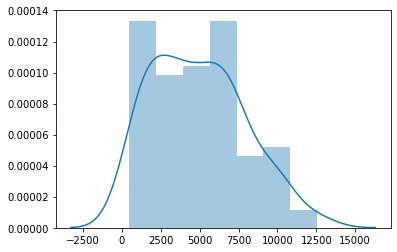

In [24]:
sns.distplot(w)